In [1]:
#Importing libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:/Users/skaguda/Downloads/conversion_data.csv')

In [3]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [4]:
df.shape

(1143, 11)

In [5]:
df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [6]:
df.columns

Index(['ad_id', 'xyz_campaign_id', 'fb_campaign_id', 'age', 'gender',
       'interest', 'Impressions', 'Clicks', 'Spent', 'Total_Conversion',
       'Approved_Conversion'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [8]:
X = df.copy()
X.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [9]:
categories = ['ad_id', 'fb_campaign_id','age', 'gender', 'xyz_campaign_id', 'interest']
X[categories] = X[categories].astype('category')

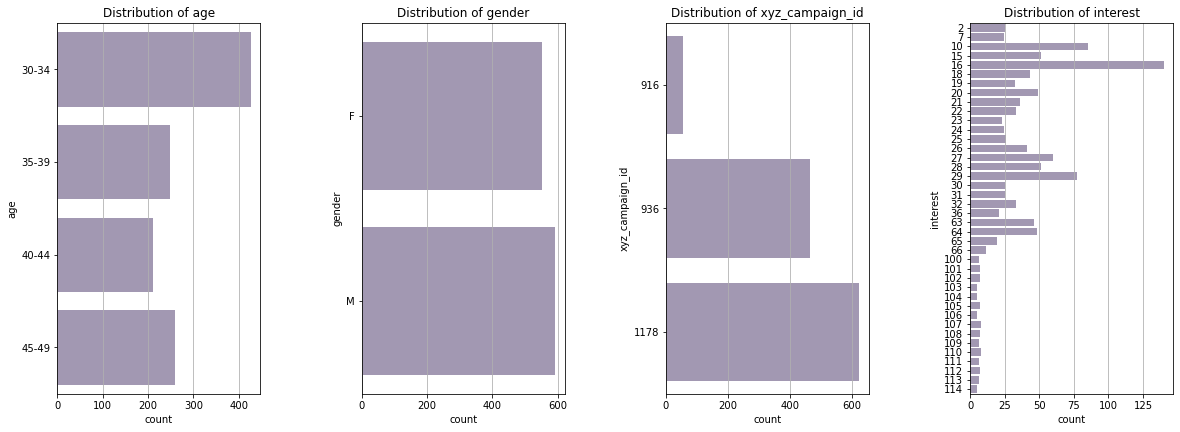

In [10]:
# Distribution of categorical variables, except ad_id & fb_campaign_id
x=0
fig=plt.figure(figsize=(20,15))
plt.subplots_adjust(wspace = 0.5)

for i in X[categories[2:]]:
    ax = plt.subplot(241+x)
    ax = sns.countplot(data=X, y=i, color = '#A194B6')
    plt.grid(axis='x')
    ax.set_title(f'Distribution of {i}')
    x+=1

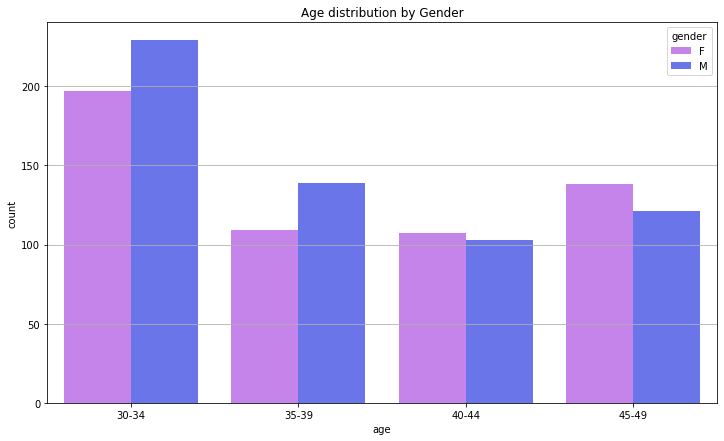

In [11]:
fig=plt.figure(figsize=(12,7))

sns.countplot(data=X, x='age', hue='gender', palette=['#C873FB', '#5663FF'])
plt.title('Age distribution by Gender')
plt.grid(axis='y')

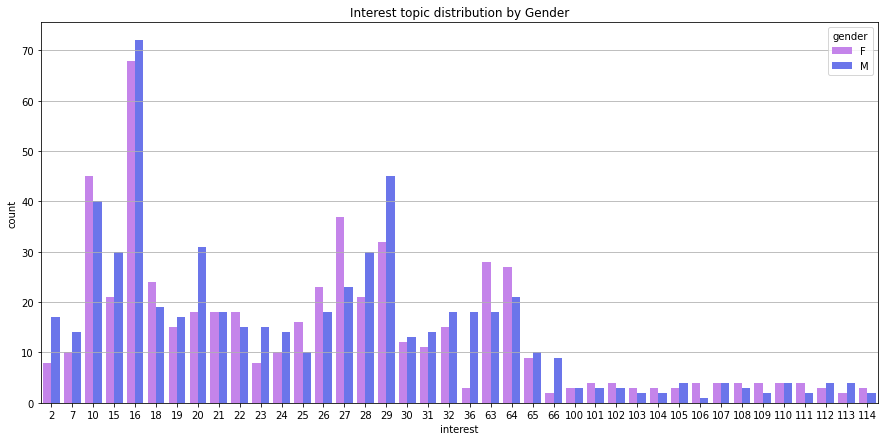

In [12]:
fig=plt.figure(figsize=(15,7))

sns.countplot(data=X, x='interest', hue='gender', palette=['#C873FB', '#5663FF'])
plt.title('Interest topic distribution by Gender')
plt.grid(axis='y')

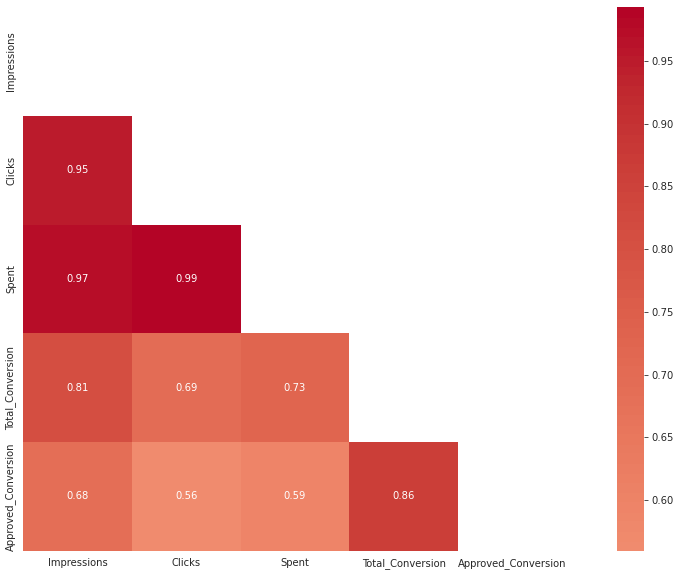

In [13]:
#Plotting heatmap to show correlation of data

# Correlation matrix
corr = X.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,10))
    sns.heatmap(corr,  mask=mask, annot=True, cmap='coolwarm', center=0, square=True)

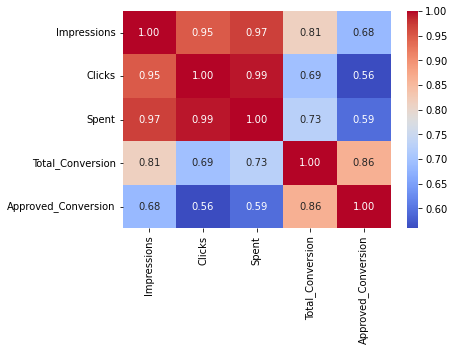

In [14]:
g=sns.heatmap(X[["Impressions","Clicks","Spent","Total_Conversion","Approved_Conversion"]].corr(),annot=True ,fmt=".2f", cmap="coolwarm")

### Here, "Impressions" and "Total_Conversion" are more correlated with "Approved_Conversion" than "Clicks" and "Spent".

In [15]:
#Dropping first 4 columns in dataframe X because they have no correlation with Approved Conversion.

X.drop(['ad_id','xyz_campaign_id','fb_campaign_id','age'], axis=1)

,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,M,15,7350,1,1.430000,2,1
1,M,16,17861,2,1.820000,2,0
2,M,20,693,0,0.000000,1,0
3,M,28,4259,1,1.250000,1,0
4,M,28,4133,1,1.290000,1,1
...,...,...,...,...,...,...,...
1138,F,109,1129773,252,358.189997,13,2
1139,F,110,637549,120,173.880003,3,0
1140,F,111,151531,28,40.289999,2,0
1141,F,113,790253,135,198.710001,8,2


In [16]:
total_conversion_df = df.groupby('fb_campaign_id')[['Impressions', 'Clicks', 'Spent']].mean()
data = pd.DataFrame(total_conversion_df)
data

,Impressions,Clicks,Spent
fb_campaign_id,,,
103916,7350.0,1.0,1.430000
103917,17861.0,2.0,1.820000
103920,693.0,0.0,0.000000
103928,4196.0,1.0,1.270000
103929,1915.0,0.0,0.000000
...,...,...,...
179977,1129773.0,252.0,358.189997
179978,637549.0,120.0,173.880003
179979,151531.0,28.0,40.289999


### Data Preprocessing

In [17]:
features = total_conversion_df.values
features

array([[7.35000000e+03, 1.00000000e+00, 1.42999995e+00],
       [1.78610000e+04, 2.00000000e+00, 1.82000002e+00],
       [6.93000000e+02, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.51531000e+05, 2.80000000e+01, 4.02899995e+01],
       [7.90253000e+05, 1.35000000e+02, 1.98710001e+02],
       [5.13161000e+05, 1.14000000e+02, 1.65609999e+02]])

In [18]:
# Standardization
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_features

array([[-0.54421246, -0.52820627, -0.53751754],
       [-0.49697268, -0.50480229, -0.53131265],
       [-0.57413114, -0.55161025, -0.56026878],
       ...,
       [ 0.10378284,  0.1037012 ,  0.08074336],
       [ 2.97440278,  2.60792708,  2.60119867],
       [ 1.72906315,  2.1164435 ,  2.07457908]])

### The  Elbow Method - Choosing the number of K

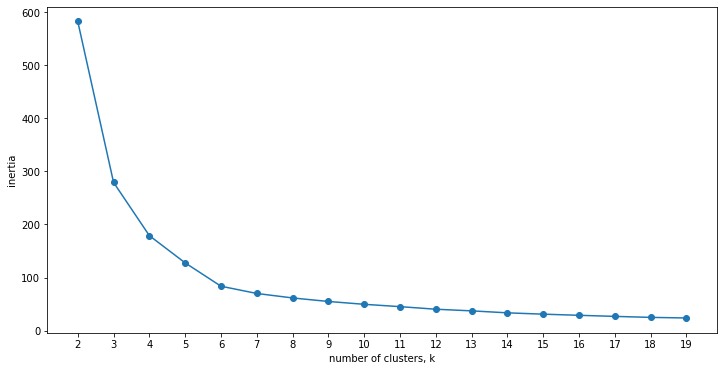

In [19]:
ks = range(2, 20)
inertias = []

for k in ks:
    model = KMeans(n_clusters= k)
    clusters =  model.fit(scaled_features)
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.figure(figsize=(12,6))
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

### Using the Silhouette Score to confirm clusters needed

<AxesSubplot:ylabel='n_clusters'>

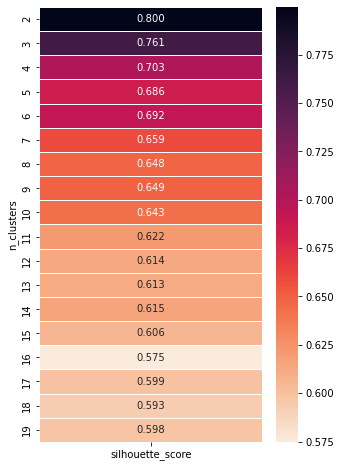

In [20]:
ks = range(2,20)
results = []

for k in ks:
    model = KMeans(n_clusters= k)
    cluster_l = model.fit_predict(scaled_features)
    silh_avg = silhouette_score(scaled_features, cluster_l)
    results.append([k, silh_avg])

result = pd.DataFrame(results, columns = ['n_clusters', 'silhouette_score'])
pivot_km = pd.pivot_table(result, index='n_clusters', values='silhouette_score')

plt.figure(figsize=(5,8))
sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap = 'rocket_r')

### The results show that 3 seems to be the right number of clusters, so I will use 3 clusters.

In [21]:
MODEL = KMeans(n_clusters=3)
MODEL.fit(scaled_features)

KMeans(n_clusters=3)

In [22]:
data['Cluster'] = MODEL.predict(scaled_features)
data.head()

,Impressions,Clicks,Spent,Cluster
fb_campaign_id,,,,
103916,7350.0,1.0,1.43,2
103917,17861.0,2.0,1.82,2
103920,693.0,0.0,0.00,2
103928,4196.0,1.0,1.27,2
103929,1915.0,0.0,0.00,2


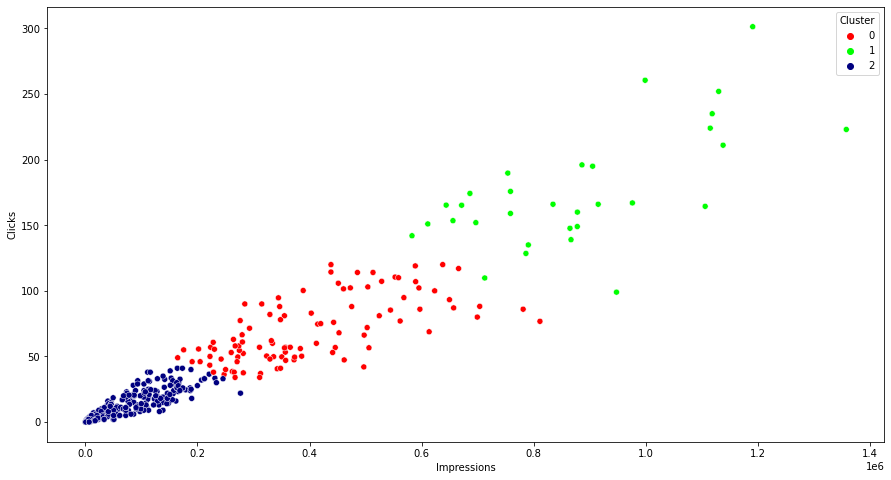

In [23]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=data, x='Impressions', y='Clicks', hue = 'Cluster', palette=['#FF0000', '#00FF00', '#000080'])
plt.show()

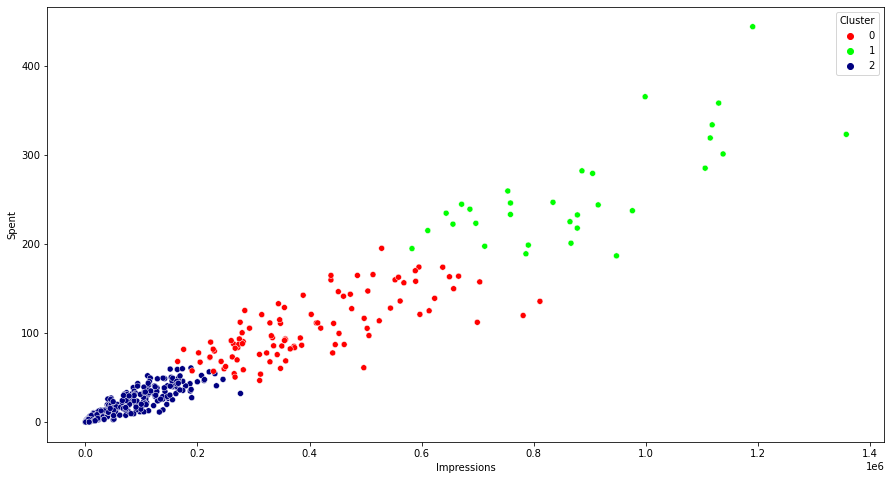

In [24]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=data, x='Impressions', y='Spent', hue = 'Cluster',  palette=['#FF0000', '#00FF00', '#000080'])
plt.show()

In [25]:
#Finding out Campaigns types

df["xyz_campaign_id"].unique()

array([ 916,  936, 1178], dtype=int64)

In [26]:
#Replacing campaigns types with labels

df["xyz_campaign_id"].replace({916:"campaign_a",936:"campaign_b",1178:"campaign_c"}, inplace=True)

In [27]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,campaign_a,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,campaign_a,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,campaign_a,103920,30-34,M,20,693,0,0.00,1,0
3,708815,campaign_a,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,campaign_a,103928,30-34,M,28,4133,1,1.29,1,1


In [28]:
a=[]
b=[]
c=[]
for i,j,k in zip(df.xyz_campaign_id, df.fb_campaign_id, df.Approved_Conversion):
    if i=="campaign_c":
      a.append(i),b.append(j),c.append(k)

In [29]:
d={'Advert_Type':a, 'fb_campaign_id':b, 'Approved_Conversion':c}     
campaign_c=pd.DataFrame(d)
campaign_c.head()

,Advert_Type,fb_campaign_id,Approved_Conversion
0,campaign_c,144531,14
1,campaign_c,144531,5
2,campaign_c,144531,1
3,campaign_c,144531,2
4,campaign_c,144531,2


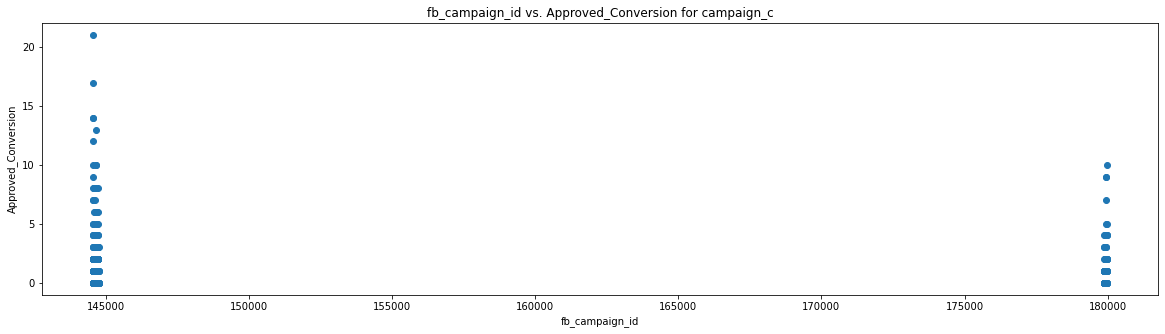

In [30]:
#Distribution of fb_campaign_id with Approved_Conversion for campaign_c

plt.figure(figsize=(20,5))
plt.scatter(campaign_c["fb_campaign_id"], campaign_c["Approved_Conversion"])
plt.title("fb_campaign_id vs. Approved_Conversion for campaign_c")
plt.xlabel("fb_campaign_id")
plt.ylabel("Approved_Conversion")
plt.show()

Note : (916, 936, 1178) xyz_campaign_ids were replaced by campaign_a, campaign_b and campaign_c)

Correlations:
"Impressions" and "Total_Conversion" are more correlated with "Approved_Conversion" than "Clicks" and "Spent".

Campaigns:
Campaign_c has most number of ads.
compaign_c has better Approved_conversion count, i.e. most people bought products in campaign_c.

Age:
In campaign_c and campaign_b, the age group of 30-34 shows more interest, whereas in campaign_a the age group of 40-44 shows more interest.

Gender:
Both the genders shows similar interests in all three campaigns.

In [31]:
#Hierachical Clustering

from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns
sns.set_style('dark')

In [32]:
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as hc
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

In [ ]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_normalized = normalize(X_scaled)
#
# Reduce the dimensionality of data to 3 features
#
pca = PCA(n_components=3)
df_pca = pca.fit_transform(X_normalized)
df_pca = pd.DataFrame(df_pca)
df_pca.columns = ['P1', 'P2', 'P3']
#
# Create the Dendogram plot
#
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
dendrogram = hc.dendrogram((hc.linkage(df_pca, method ='ward')))